<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-cyber-data-alchemist/blob/main/Data_Analysis_with_Python_Modulo5_A01793023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


> On this notebook the exercises, practices and follow up from the module 5 will be reviewed. This serves as a demonstrantion and an exercise for the Data Science Class (TC4029) of the MNA Master's degree program of the ITESM and is created by A01793023 - Jorge Luis Arroyo Chavelas. For questions, please reach out to A01793023@tec.mx

# IBM: DA0101EN Data Analysis with Python
---



# Module 5 - Model Evaluation

## Model Evaluation and Refinement
In this module we will review:
* Model Evaluation
* Over-fitting, Under-fitting and Model Selection
* Ridge Regression
* Grid Search

And in general to answer the question how can we be certain our model works in the real world and performs optimally.


## Model Evaluation
Model evaluation tell us: how our model performs in the real world. To do this we split our trainning data in two: trainning data and test data.

We can for example divide our data in 10 and use 7 of this (70%) to train our model and the rest 3 (30%) to perform our tests.

Splitting data:
``` markdown
Trainning data: [][][][][][][]
Test data: [][][]
```

Python has for this:
``` python
from sklearn.model_selection import train_test_split

X_train, x_train, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3, random_state=0

```
This will create 4 datasets: two for X and two for y, those are divided into trainning and test. The X represents the features and y the target variable.

Logic and intention here is: The more data we have in trainning the more the model will learn how to do that data specifically, removing data points allow us to get a more generalized, this is: less how to overfit and more how to generalize.

This is a balance between generalization in precission; using the same data give us precission but lack of generalization, using sparse data might give us good generalization but bad precission, to overcome this one technique we might use is cross validation, in this we divide the trainn data into k-folds, graphically:

``` markdown
Data: 
Fold 1: [ ][ ][ ][V]
Fold 2: [ ][ ][V][ ]
Fold 3: [ ][V][ ][ ]
Fold 4: [V][ ][ ][ ]

```
This is: we divide the dataset and take one subset as the validation, then we go on a second fold and include now part of what we use to validate as trainning, but removing other piece; we do that for all the folds – This basically gives us the ability of trainning with all the data but without falling into over-fitting and lean more towards generalization as the models train only with subsets, but the bagging of all them uses all the data.

In python we can use this with:
``` python
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, x_data, y_data, cv=3)
```
The first vartiable is the model we will use, then the data into the features and target and finally the split. We use the mean of the variables to determine the mean cost or target function of the model.

## Overfitting, Underfitting and Model Selection
There are two types of troubles where we train models: over-fitting and under-fitting, the latter is where models fall to generalize because they learn how to represent the exacct data they are dealing with, the latter happens when our models falls to understand the trainning data. When we have an overfitted model, chances are that it will be not very good at generaling; if what happens is an underfit, then our model will be also bad with the test data as in general will not know how to represent what is triying to predict/ckassify.

Graphically we have:

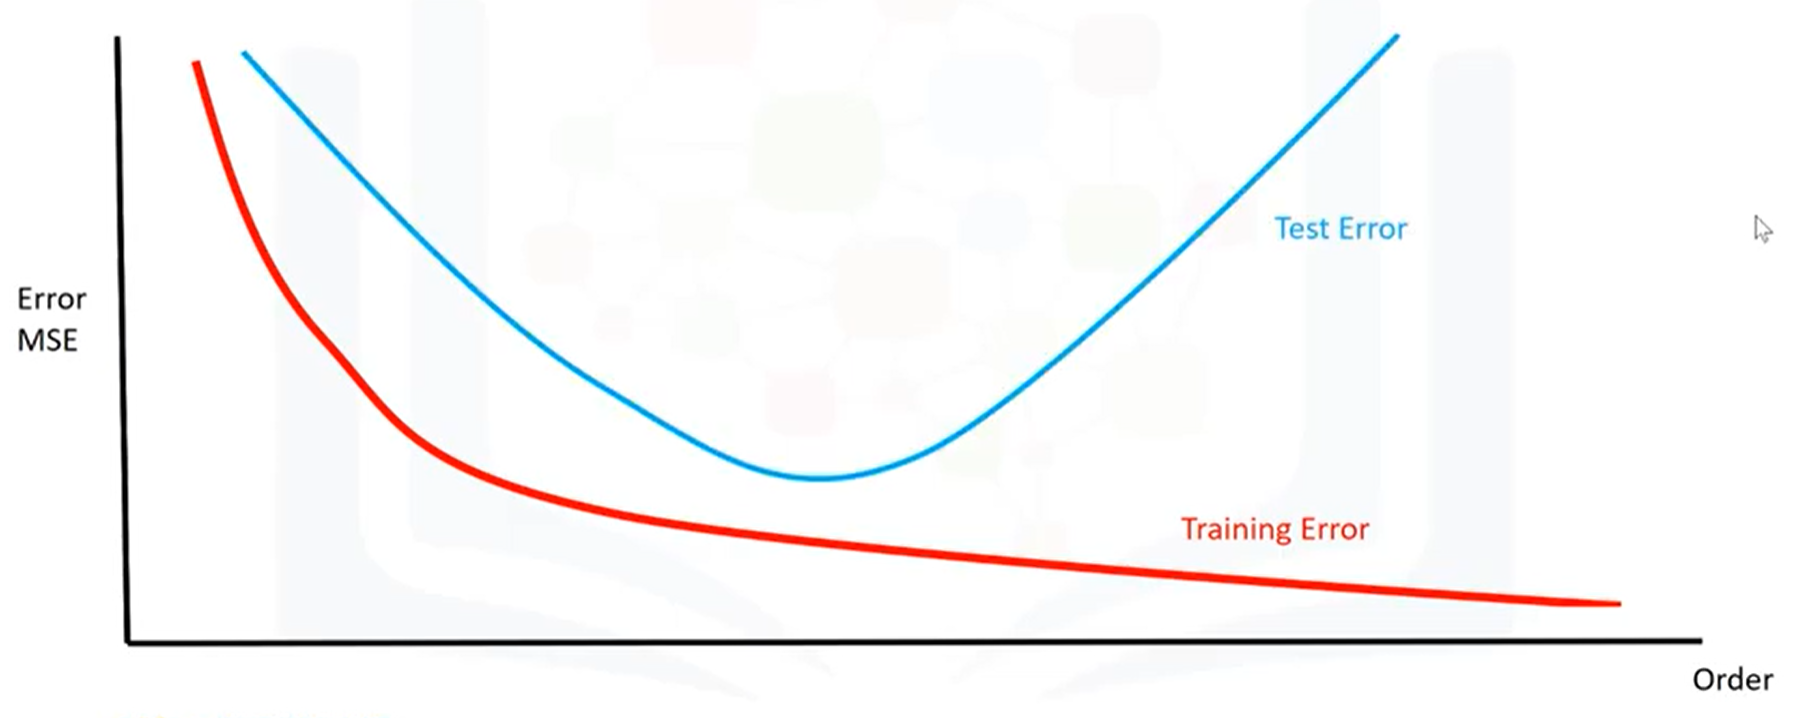

In this chart the left side represents the underfitting trouble where our model has large errors, as we progres we find a point where the test error is minimized as well of the trainning error, that is the sweet spot, beyond that, at the right side, lies the over-fitting trouble where our trainning error reduces but is bad for generalization as we have more test errors; most likely, because our model learned how to fit the noise and not only the function.

## Ridge Regression
One particular good regression is ridge regression in terms of preventing overfitting. The ridge regression has a hyperpameter alpha that works as a weight to reduce coefficients in linear regressions; this prevent models from following outliers and noise by making it more horizontal by penalizing the coefficients.

Low alpha let the model overfit, large alphas create very horizontal models that fall into underfit; but moving this alpha allow us a technique to move in the curves of test error and trainning error to get to the sweetspot where both models are minimized.

``` python
from sklearn.linear_model import Ridge
RM = Ridge(alpha=0.1)
RM.fit(X,Y)
Yhat = RM.predict(X)
```

## Grid Search
The section before creates a challenge. How can we select an optimal alpha programatically by iterating on different values of the hyper-parameter alpha? One by One? By no means! we have Grid Search CV, this method allow us to do the cross validation experiments iterating over different values and get the results of this; allowing us, of course, to also select the best set of hyperparameters and the corresponding best value attained with those combinations.

``` python
from sklearn.linear_model importa Ridge
from sklearn.model_selection import GridSearchCV
RM = Ridge()
parameters = [
  {'alpha': [0.001, 0.01, 0.1, 1]},
  {'normalize': [True, False]},
]
Grid = GridSearchCV(RM, parameters, cv=3)
Grid.git(X_data, y_data)

Grid.best_estimator_
Grid.best_parameters_

```
The key here is the list of parameters where we can pass on dictionaries different combinations we would like to explore; for all of those will do the cross validation and generate the results which will allow us to identify what is the set of hyperparameters we need to use to get the best result of our model.

Lab 5 - Model Evaluation

## 0 Setup

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

path = path = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/Data%20files/module_5_auto.csv'
# Import pandas library
import pandas as pd

# Read the online file by the URL provides above, and assign it to variable "df"
df = pd.read_csv(path)
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,make,aspiration,num-of-doors,body-style,drive-wheels,engine-location,...,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,horsepower-binned,diesel,gas
0,0,0,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,13495.0,11.190476,Medium,0,1
1,1,1,3,122,alfa-romero,std,two,convertible,rwd,front,...,9.0,111.0,5000.0,21,27,16500.0,11.190476,Medium,0,1
2,2,2,1,122,alfa-romero,std,two,hatchback,rwd,front,...,9.0,154.0,5000.0,19,26,16500.0,12.368421,Medium,0,1
3,3,3,2,164,audi,std,four,sedan,fwd,front,...,10.0,102.0,5500.0,24,30,13950.0,9.791667,Medium,0,1
4,4,4,2,164,audi,std,four,sedan,4wd,front,...,8.0,115.0,5500.0,18,22,17450.0,13.055556,Medium,0,1


In [2]:
df=df._get_numeric_data()
df.head()

,Unnamed: 0,Unnamed: 0.1,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,...,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price,city-L/100km,diesel,gas
0,0,0,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,13495.0,11.190476,0,1
1,1,1,3,122,88.6,0.811148,0.890278,48.8,2548,130,...,2.68,9.0,111.0,5000.0,21,27,16500.0,11.190476,0,1
2,2,2,1,122,94.5,0.822681,0.909722,52.4,2823,152,...,3.47,9.0,154.0,5000.0,19,26,16500.0,12.368421,0,1
3,3,3,2,164,99.8,0.848630,0.919444,54.3,2337,109,...,3.40,10.0,102.0,5500.0,24,30,13950.0,9.791667,0,1
4,4,4,2,164,99.4,0.848630,0.922222,54.3,2824,136,...,3.40,8.0,115.0,5500.0,18,22,17450.0,13.055556,0,1


### Functions for Plotting


In [3]:
from ipywidgets import interact, interactive, fixed, interact_manual

In [4]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Price (in dollars)')
    plt.ylabel('Proportion of Cars')

    plt.show()
    plt.close()

In [5]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim([-10000, 60000])
    plt.ylabel('Price')
    plt.legend()

## Part 1

In [6]:
y_data = df['price']

In [7]:
x_data=df.drop('price',axis=1)

In [8]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.10, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 21
number of training samples: 180


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #1):</h1>

<b>Use the function "train_test_split" to split up the dataset such that 40% of the data samples will be utilized for testing. Set the parameter "random_state" equal to zero. The output of the function should be the following:  "x_train1" , "x_test1", "y_train1" and  "y_test1".</b>

</div>

In [9]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0) 
print("number of test samples :", x_test1.shape[0])
print("number of training samples:",x_train1.shape[0])

number of test samples : 81
number of training samples: 120


In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
lre=LinearRegression()

In [12]:
lre.fit(x_train[['horsepower']], y_train)

LinearRegression()

In [13]:
lre.score(x_test[['horsepower']], y_test)

0.36358755750788263

In [14]:
lre.score(x_train[['horsepower']], y_train)

0.6619724197515104

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #2): </h1>
<b> 
Find the R^2  on the test data using 40% of the dataset for testing.
</b>
</div>


In [15]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x_data, y_data, test_size=0.4, random_state=0)
lre.fit(x_train1[['horsepower']],y_train1)
lre.score(x_test1[['horsepower']],y_test1)

0.7139364665406973

### Cross-Validation Score

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
Rcross = cross_val_score(lre, x_data[['horsepower']], y_data, cv=4)

In [18]:
Rcross

array([0.7746232 , 0.51716687, 0.74785353, 0.04839605])

In [19]:
print("The mean of the folds are", Rcross.mean(), "and the standard deviation is" , Rcross.std())

The mean of the folds are 0.522009915042119 and the standard deviation is 0.291183944475603


In [20]:
-1 * cross_val_score(lre,x_data[['horsepower']], y_data,cv=4,scoring='neg_mean_squared_error')

array([20254142.84026702, 43745493.2650517 , 12539630.34014931,
       17561927.72247591])

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #3): </h1>
<b> 
Calculate the average R^2 using two folds, then find the average R^2 for the second fold utilizing the "horsepower" feature: 
</b>
</div>


In [21]:
Rc=cross_val_score(lre,x_data[['horsepower']], y_data,cv=2)
Rc.mean()

0.5166761697127429

In [22]:
from sklearn.model_selection import cross_val_predict

In [23]:
yhat = cross_val_predict(lre,x_data[['horsepower']], y_data,cv=4)
yhat[0:5]

array([14141.63807508, 14141.63807508, 20814.29423473, 12745.03562306,
       14762.35027598])

## Part2

In [24]:
lr = LinearRegression()
lr.fit(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_train)

LinearRegression()

In [25]:
yhat_train = lr.predict(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_train[0:5]

array([ 7426.6731551 , 28323.75090803, 14213.38819709,  4052.34146983,
       34500.19124244])

In [26]:
yhat_test = lr.predict(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])
yhat_test[0:5]

array([11349.35089149,  5884.11059106, 11208.6928275 ,  6641.07786278,
       15565.79920282])

In [27]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


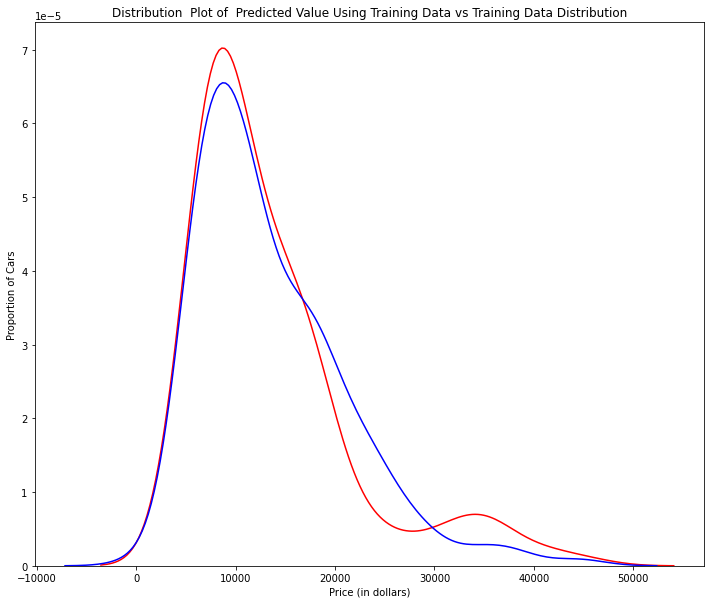

In [28]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


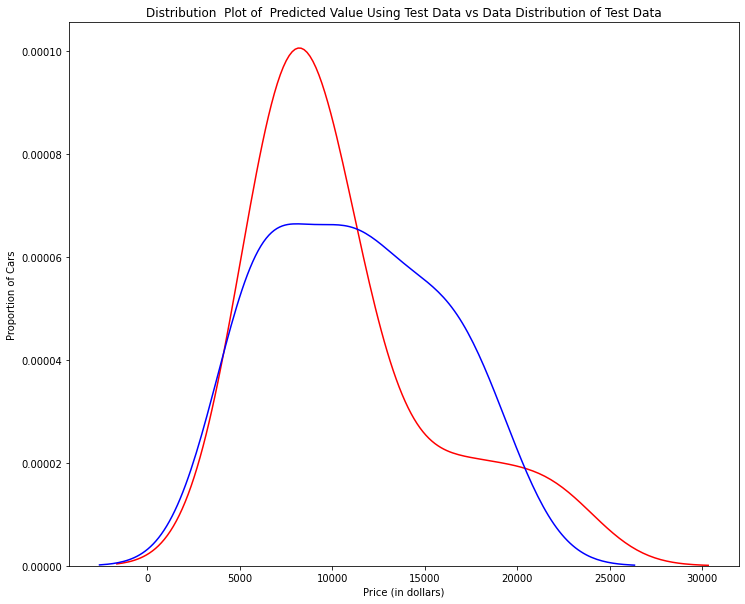

In [29]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [30]:
from sklearn.preprocessing import PolynomialFeatures

## Overfitting

In [31]:
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [32]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['horsepower']])
x_test_pr = pr.fit_transform(x_test[['horsepower']])
pr

PolynomialFeatures(degree=5)

In [33]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression()

In [34]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([ 6728.65561887,  7307.98782321, 12213.78770965, 18893.24804015,
       19995.95195136])

In [35]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [ 6728.65561887  7307.98782321 12213.78770965 18893.24804015]
True values: [ 6295. 10698. 13860. 13499.]


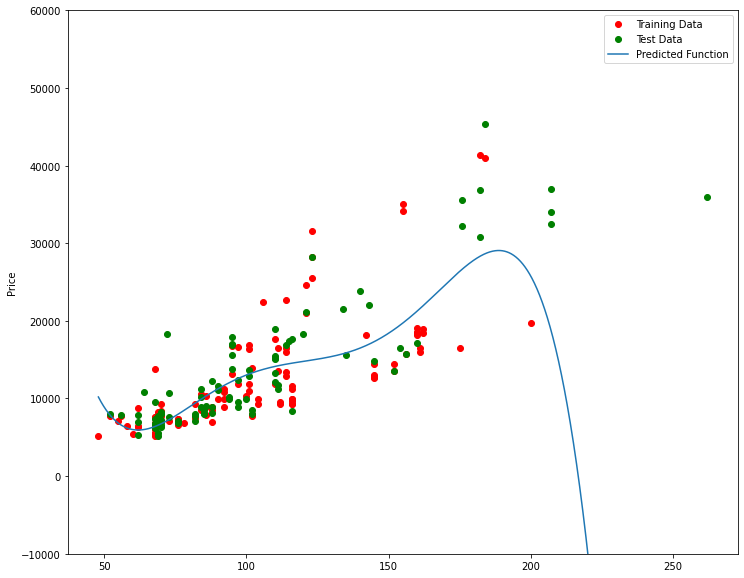

In [36]:
PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train, y_test, poly,pr)

In [37]:
poly.score(x_train_pr, y_train)

0.556771690212023

In [38]:
poly.score(x_test_pr, y_test)

-29.87134030204415

Text(3, 0.75, 'Maximum R^2 ')

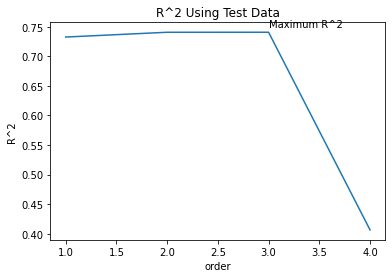

In [39]:
Rsqu_test = []

order = [1, 2, 3, 4]
for n in order:
    pr = PolynomialFeatures(degree=n)
    
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    
    x_test_pr = pr.fit_transform(x_test[['horsepower']])    
    
    lr.fit(x_train_pr, y_train)
    
    Rsqu_test.append(lr.score(x_test_pr, y_test))

plt.plot(order, Rsqu_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data')
plt.text(3, 0.75, 'Maximum R^2 ')    

In [40]:
def f(order, test_data):
    x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=test_data, random_state=0)
    pr = PolynomialFeatures(degree=order)
    x_train_pr = pr.fit_transform(x_train[['horsepower']])
    x_test_pr = pr.fit_transform(x_test[['horsepower']])
    poly = LinearRegression()
    poly.fit(x_train_pr,y_train)
    PollyPlot(x_train[['horsepower']], x_test[['horsepower']], y_train,y_test, poly, pr)

In [41]:
interact(f, order=(0, 6, 1), test_data=(0.05, 0.95, 0.05))

interactive(children=(IntSlider(value=3, description='order', max=6), FloatSlider(value=0.45, description='tes…

<function __main__.f(order, test_data)>

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4a):</h1>

<b>We can perform polynomial transformations with more than one feature. Create a "PolynomialFeatures" object "pr1" of degree two.</b>

</div>


In [42]:
pr1=PolynomialFeatures(degree=2)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4b): </h1>

<b> 
 Transform the training and testing samples for the features 'horsepower', 'curb-weight', 'engine-size' and 'highway-mpg'. Hint: use the method "fit_transform".</b>
</div>


In [43]:
x_train_pr1=pr1.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])

x_test_pr1=pr1.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']])


<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4c): </h1>
<b> 
How many dimensions does the new feature have? Hint: use the attribute "shape".
</b>
</div>


In [44]:
x_train_pr1.shape[1]

15

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4d): </h1>

<b> 
Create a linear regression model "poly1". Train the object using the method "fit" using the polynomial features.</b>
</div>


In [45]:
poly1=LinearRegression().fit(x_train_pr1,y_train)


 <div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4e): </h1>
<b>Use the method  "predict" to predict an output on the polynomial features, then use the function "DistributionPlot" to display the distribution of the predicted test output vs. the actual test data.</b>
</div>


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


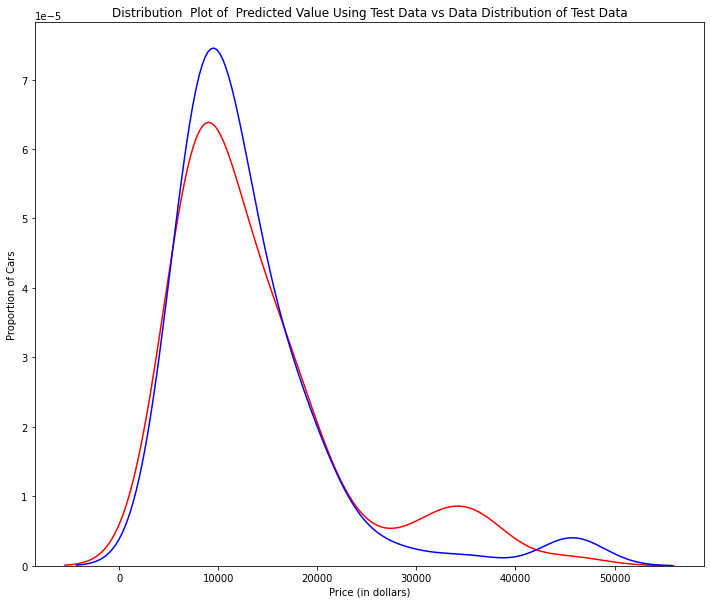

In [46]:
yhat_test1=poly1.predict(x_test_pr1)

Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'

DistributionPlot(y_test, yhat_test1, "Actual Values (Test)", "Predicted Values (Test)", Title)

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #4f): </h1>

<b>Using the distribution plot above, describe (in words) the two regions where the predicted prices are less accurate than the actual prices.</b>

</div>


in the peaks: one arround 10k and also on what happens between 30k and 40k

## Part 3

In [47]:
pr=PolynomialFeatures(degree=2)
x_train_pr=pr.fit_transform(x_train[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])
x_test_pr=pr.fit_transform(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg','normalized-losses','symboling']])

In [48]:
from sklearn.linear_model import Ridge

In [49]:
RigeModel=Ridge(alpha=1)

In [50]:
RigeModel.fit(x_train_pr, y_train)

Ridge(alpha=1)

In [51]:
yhat = RigeModel.predict(x_test_pr)

In [52]:
print('predicted:', yhat[0:4])
print('test set :', y_test[0:4].values)

predicted: [ 6570.82441941  9636.2489147  20949.92322737 19403.60313256]
test set : [ 6295. 10698. 13860. 13499.]


In [53]:
from tqdm import tqdm

Rsqu_test = []
Rsqu_train = []
dummy1 = []
Alpha = 10 * np.array(range(0,1000))
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})

    Rsqu_test.append(test_score)
    Rsqu_train.append(train_score)

100%|██████████| 1000/1000 [00:09<00:00, 110.72it/s, Test Score=0.564, Train Score=0.859]


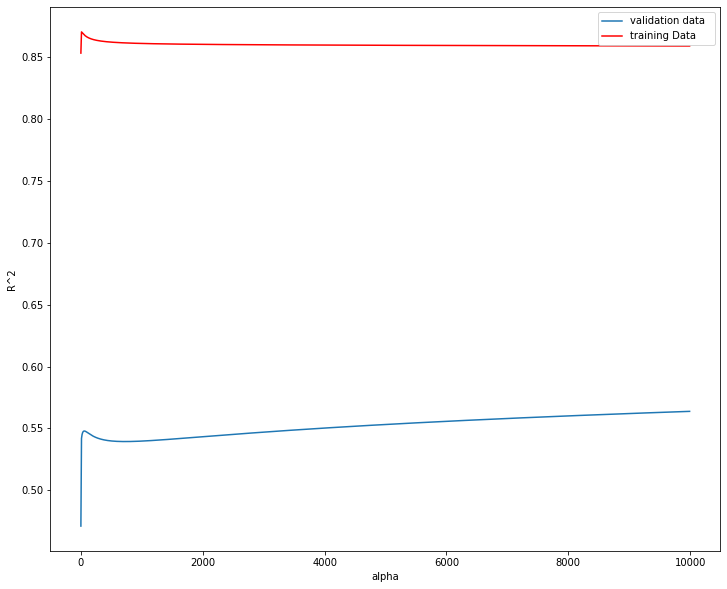

In [54]:
width = 12
height = 10
plt.figure(figsize=(width, height))

plt.plot(Alpha,Rsqu_test, label='validation data  ')
plt.plot(Alpha,Rsqu_train, 'r', label='training Data ')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.legend()

<div class="alert alert-danger alertdanger" style="margin-top: 20px">
<h1> Question  #5): </h1>

Perform Ridge regression. Calculate the R^2 using the polynomial features, use the training data to train the model and use the test data to test the model. The parameter alpha should be set to 10.

</div>


In [55]:
RigeModel = Ridge(alpha=10) 
RigeModel.fit(x_train_pr, y_train)
RigeModel.score(x_test_pr, y_test)

0.5418576440206702

## Part 4

In [56]:
from sklearn.model_selection import GridSearchCV

In [57]:
parameters1= [{'alpha': [0.001,0.1,1, 10, 100, 1000, 10000, 100000, 100000]}]
parameters1

[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000, 100000]}]

In [58]:
RR=Ridge()

In [59]:
Grid1 = GridSearchCV(RR, parameters1,cv=4)

In [60]:
Grid1.fit(x_data[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_data)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.001, 0.1, 1, 10, 100, 1000, 10000, 100000,
                                    100000]}])

In [61]:
BestRR=Grid1.best_estimator_
BestRR

Ridge(alpha=10000)

In [62]:
BestRR.score(x_test[['horsepower', 'curb-weight', 'engine-size', 'highway-mpg']], y_test)

0.8411649831036151

---
--- Fin ---